# Visualizing Data using SOMs(U-Matrix Implementation)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches as patches
%matplotlib inline

In [2]:
#loading dataset
data = pd.read_csv("iris.txt",header=None,names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class'])
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1
5,5.0,3.4,1.5,0.2,1
6,4.9,3.1,1.5,0.1,1
7,5.4,3.7,1.5,0.2,1
8,4.8,3.0,1.4,0.1,1
9,4.3,3.0,1.1,0.1,1


In [3]:
#Dropping label column and standardization
data = data.drop(data.columns[-1],axis=1)
train = StandardScaler().fit_transform(data.values)
pd.DataFrame(train)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.506521,0.106445,-1.284407,-1.312977
3,-1.021849,1.263460,-1.341272,-1.312977
4,-1.506521,0.800654,-1.341272,-1.181504
...,...,...,...,...
145,0.674501,0.106445,0.990221,0.790591
146,1.038005,0.106445,1.047087,1.579429
147,1.159173,0.337848,1.217684,1.447956
148,0.553333,-1.281972,0.705893,0.922064


In [4]:
#Identifying closest node to a given data point
def closest_node(data, t, maps, m_rows, m_cols):
  result = (0,0)
  smallest_dist = 1.0e20
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(maps[i][j], data[t])
      if ed < smallest_dist:
        smallest_dist = ed
        result = (i, j)
  return result

#Euclidian distance
def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2)

#Manhattan distance
def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)



Loading Iris data

Construction of 30x30 SOM from the iris dataset
step =  0


C:\Users\adhee\AppData\Local\Temp\ipykernel_16024\1567979694.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction is completed 



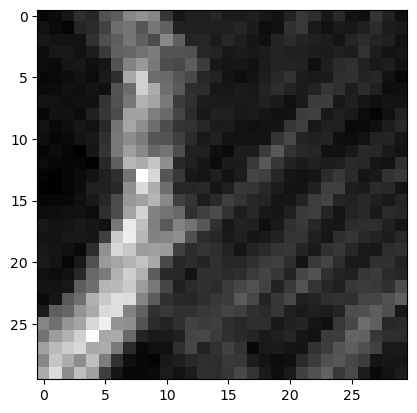

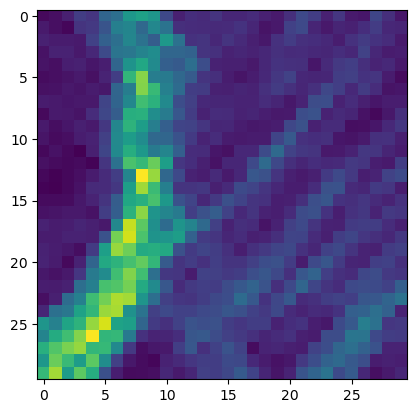

C:\Users\adhee\AppData\Local\Temp\ipykernel_16024\1567979694.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_map = np.zeros(shape=(rows,cols), dtype=np.int)
C:\Users\adhee\AppData\Local\Temp\ipykernel_16024\1217826440.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

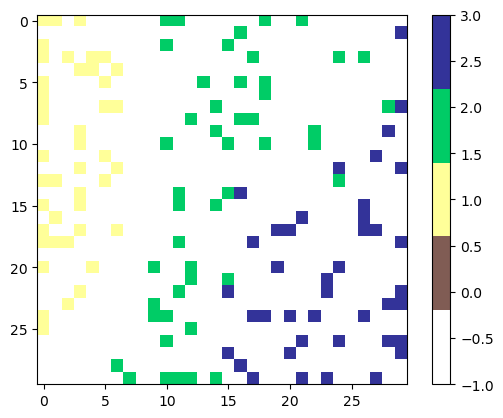

C:\Users\adhee\AppData\Local\Temp\ipykernel_16024\1567979694.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 5))


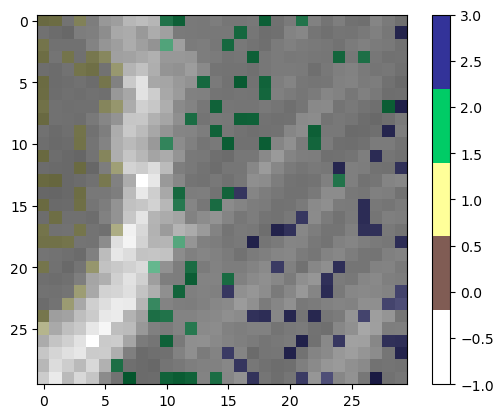

In [5]:
def main():

  np.random.seed(1)
  dim = 4
  rows = 30; cols = 30
  rangeMax = rows + cols
  learnMax = 0.5
  stepsMax = 5000

  #Loading data
  print("\nLoading Iris data\n")
  data_file = "iris.txt"
  data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4),
    dtype=np.float64)
  data_y = np.loadtxt(data_file, delimiter=",", usecols=[4],
    dtype=np.int)



  #Constructing the SOM
  print("Construction of 30x30 SOM from the iris dataset")
  maps = np.random.random_sample(size=(rows,cols,dim))
  for s in range(stepsMax):
    if s % (stepsMax/10) == 0: print("step = ", str(s))
    pct_left = 1.0 - ((s * 1.0) / stepsMax)
    curr_range = (int)(pct_left * rangeMax)
    curr_rate = pct_left * learnMax

    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, maps, rows, cols)
    for i in range(rows):
      for j in range(cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
          maps[i][j] = maps[i][j] + curr_rate * \
(data_x[t] - maps[i][j])
  print("SOM construction is completed \n")

  #Construction of U-Matrix
  u_matrix = np.zeros(shape=(rows,cols), dtype=np.float64)
  for i in range(rows):
    for j in range(cols):
      v = maps[i][j]  # a vector
      sum_dists = 0.0; ct = 0

      if i-1 >= 0:    # above
        sum_dists += euc_dist(v, maps[i-1][j]); ct += 1
      if i+1 <= rows-1:   # below
        sum_dists += euc_dist(v, maps[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += euc_dist(v, maps[i][j-1]); ct += 1
      if j+1 <= cols-1:   # right
        sum_dists += euc_dist(v, maps[i][j+1]); ct += 1

      u_matrix[i][j] = sum_dists / ct

 # displaying U-Matrix im Greyscale
  plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
  plt.show()

  # displaying U-Matrix in viridis
  plt.imshow(u_matrix, cmap='viridis')  # black = close = clusters
  plt.show()

  
  # associating each data label with a map node and plotting
  mapping = np.empty(shape=(rows,cols), dtype=object)
  for i in range(rows):
    for j in range(cols):
      mapping[i][j] = []

  for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, maps, rows, cols)
    mapping[m_row][m_col].append(data_y[t])

  label_map = np.zeros(shape=(rows,cols), dtype=np.int)
  for i in range(rows):
    for j in range(cols):
      label_map[i][j] = most_common(mapping[i][j], 4)

  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 5))
  plt.colorbar()
  plt.show()

  # superimpose label map on the grayscale U-Matrix plot
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 5))
  plt.colorbar()
  # display U-Matrix in grayscale
  plt.imshow(u_matrix, cmap='gray',alpha=0.6)  # black = close = clusters

  plt.show()

# ==================================================================
#Calling main function
main()
